# Exercise 02

### MIIIA

by 
        - Camilo Suárez            ca.suarezt    200321493
        - Jhon Alexander Hernández ja.hernandezp 200920588
        - Fernando Pérez           f-perez       200222809
        - Elquin Huertas           e.huertas     201920061
        

## Time Series Analysis

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 02.1 Find the values of rho for which a series becomes non-stationary. rho between 0 and 1 ([0,1]) \n",
`X(t) = Rho * X(t-1) + Er(t)`

In [1]:
#Importacion de librerias
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf


In [3]:
#Definicion de funcion Dickey Fuller Test of Stationarity
def ts(rho):
    random.seed(10)
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts

ADF Statistic: -14.864679
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -12.485853
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -10.235596
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -10.719702
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -10.282803
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -8.077027
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -8.136497
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -5.687984
p-value: 0.000001
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -4.030051
p-value: 0.001261
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
ADF Statistic: -3.247453
p-value: 0.017397
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


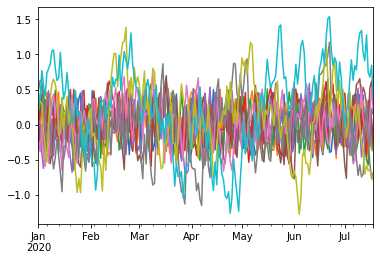

In [4]:
#Prueba de test de Dickey Fuller de 0 a 1
for i in np.arange(0, 1, 0.1):
    ts1 = ts(rho=i)
    ts1.plot()
    result = adfuller(ts1)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

En la medida que rho se acerca a 1, empieza a subir el P value, por lo tanto aumenta la posibilidad de rechazar la Ho y decir que la serie es estacionaria. 

# 02.2 Download and explore two series from google trends

In [5]:
df = pd.read_csv('C:/Users/elqui/Universidad de los Andes/Metodos Avanzados - General/multiTimeline2.csv', skiprows=1)
df.head()

,Mes,motorcycle: (Todo el mundo),bicycle: (Todo el mundo)
0,2004-01,74,29
1,2004-02,78,30
2,2004-03,88,37
3,2004-04,100,43
4,2004-05,100,45


In [6]:
df.columns = ['month', 'moto', 'cicla']
df = df.replace("<1", 0)
df.head()

,month,moto,cicla
0,2004-01,74,29
1,2004-02,78,30
2,2004-03,88,37
3,2004-04,100,43
4,2004-05,100,45


In [7]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df.head()

,moto,cicla
month,,
2004-01-01,74,29
2004-02-01,78,30
2004-03-01,88,37
2004-04-01,100,43
2004-05-01,100,45


In [8]:
df.moto=pd.to_numeric(df.moto)
df.cicla=pd.to_numeric(df.cicla)
df.dtypes

moto     int64
cicla    int64
dtype: object

Text(0.5, 0, 'Year')

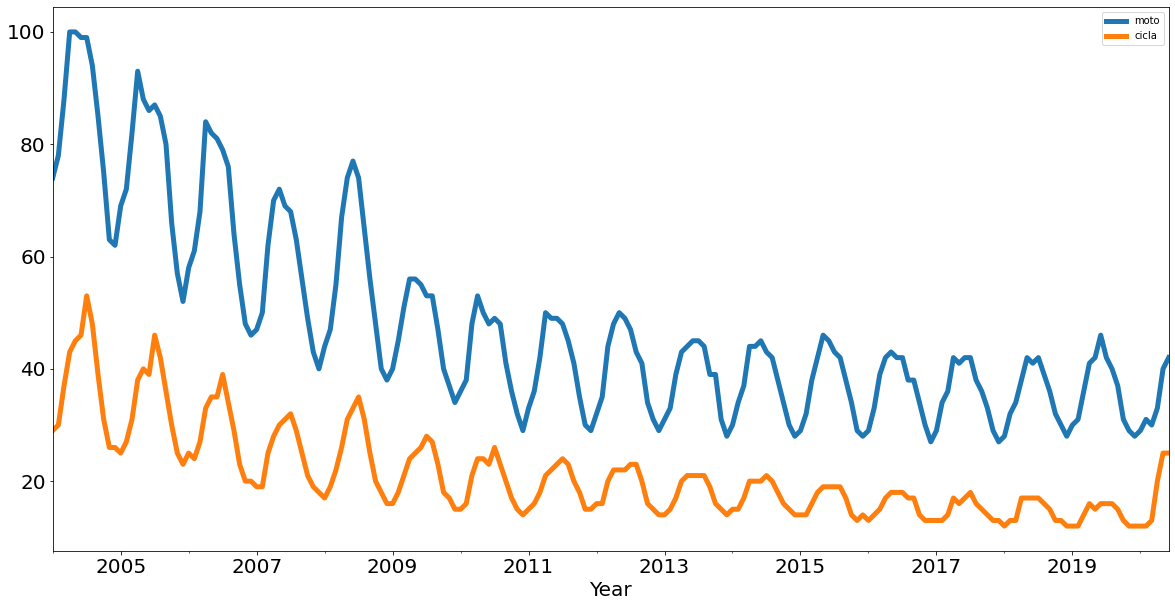

In [9]:
#Plot de la serie
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

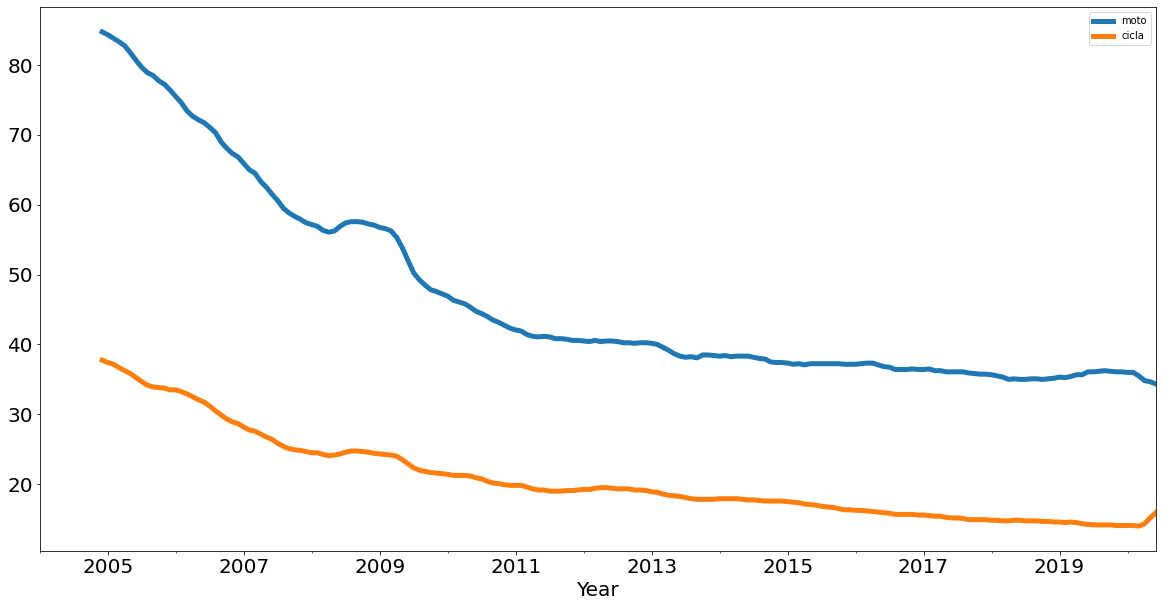

In [10]:
#Tendencia de la serie
items = df[['moto','cicla']]
items.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

#Ambas series se les ve una estacionalidad anual hacia la mitad de año cuando es el verano en el emisferio norte

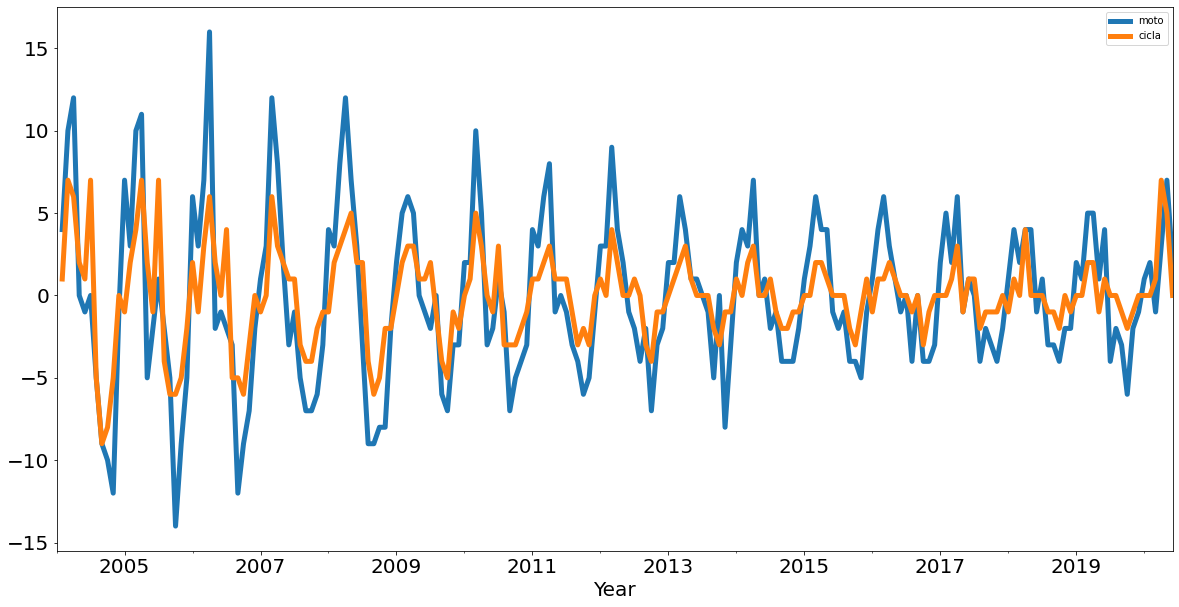

In [23]:
#Seasonality de las series de tiempo
items.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
#Se observa una tendecia similar en las series diferenciadas, con media y varianza constantes desde un análisis visual.

In [12]:
evaluate = ['moto','cicla']
for x in evaluate:
    result = adfuller(df[x])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.217885
p-value: 0.000614
Critical Values:
	1%: -3.467
	5%: -2.877
	10%: -2.575
ADF Statistic: -3.747975
p-value: 0.003487
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


* Con base en el test de Dickey-Fuller y con un nivel de significancia del %5, se concluye que la serie de motocicleta es estacionaria, evidenciando un comportamiento similar a lo largo del periodo de estudio.

* Al igual que el resultado anterior, se concluye que la serie de bicicleta es estacionaria, evidenciando un comportamiento similar a lo largo del periodo de estudio.

In [13]:
#Matriz de Correlacion
df.corr()

,moto,cicla
moto,1.000000,0.963337
cicla,0.963337,1.000000


La correlacion entre las dos series es alta y positiva

In [25]:
#Correlacion diferenciada
df.diff().corr()

,moto,cicla
moto,1.000000,0.809591
cicla,0.809591,1.000000


La correlacion de las series diferenciadas es positiva y también alta como en las series sin diferenciar. 

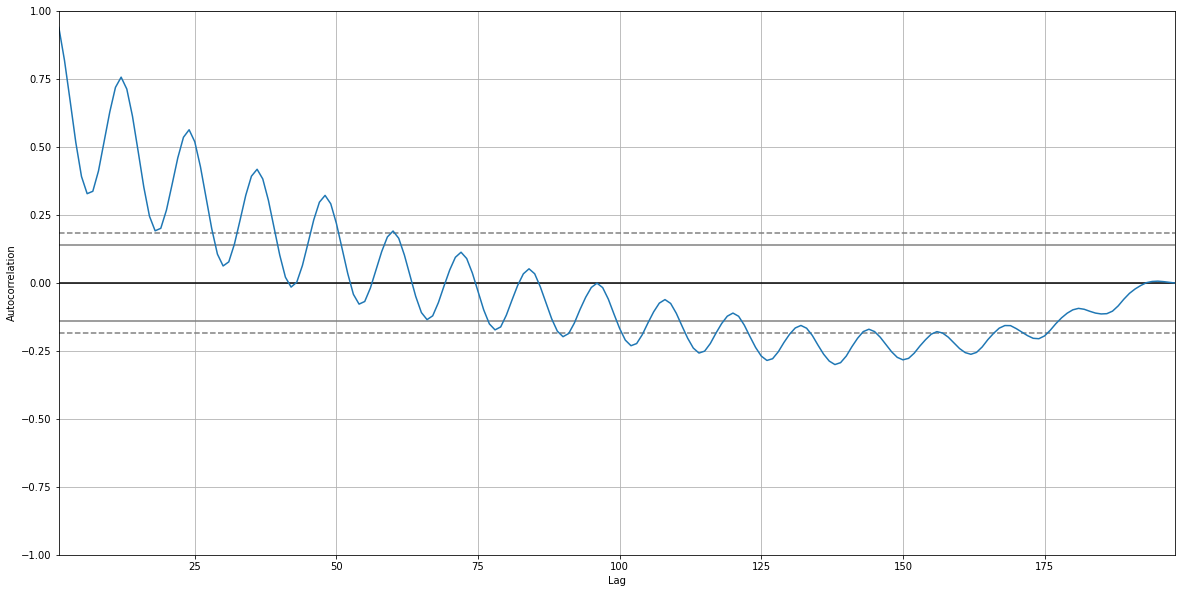

In [17]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(df[['cicla']]);


Esta serie de tiempo se nota que tiene un proceso autoregresivo con una combinación de media móvil dada la estacionalidad que se observa.

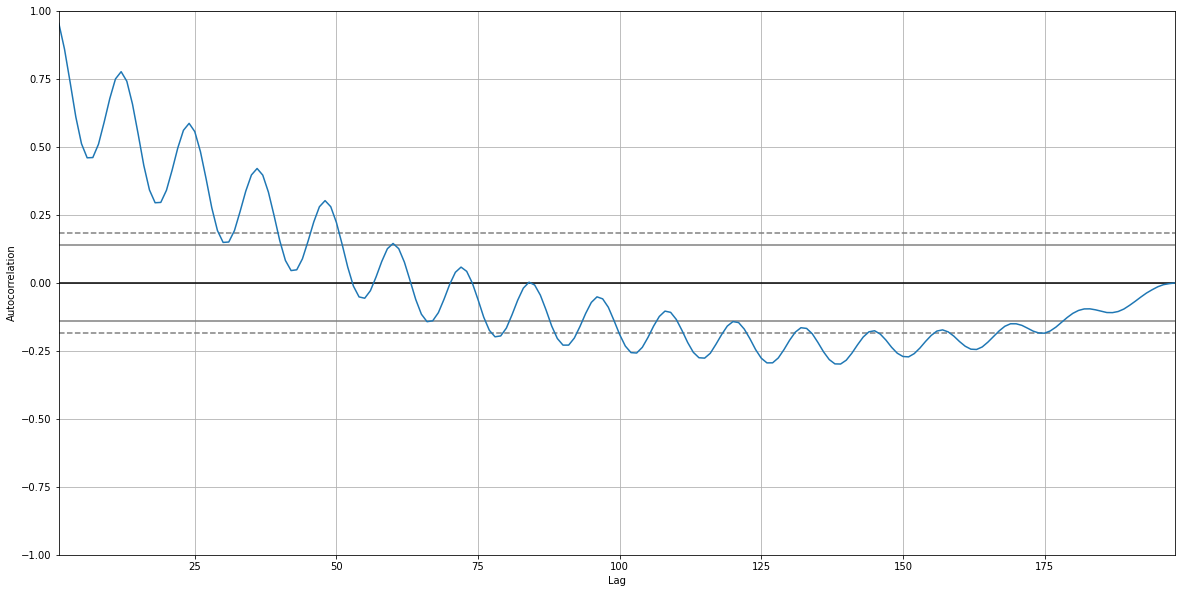

In [18]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(df[['moto']]);

Esta serie de tiempo se nota que tiene un proceso autoregresivo con una combinación de media móvil dada la estacionalidad que se observa.

C:\Users\elqui\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


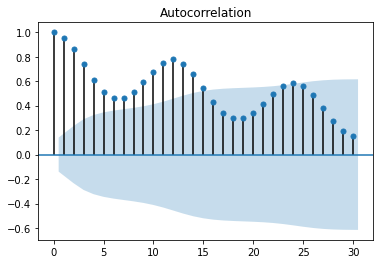

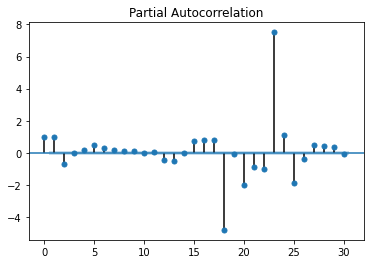

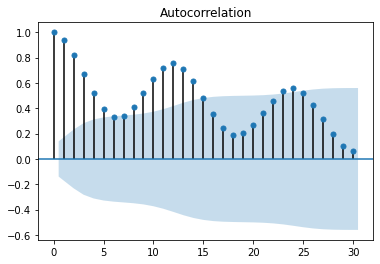

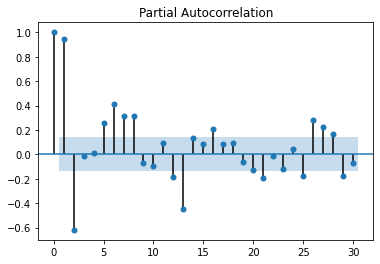

In [30]:
plot_acf(df.moto, lags=30);
plot_pacf(df.moto, lags=30);
plot_acf(df.cicla, lags=30);
plot_pacf(df.cicla, lags=30);